PROBLEM 1

In [123]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns



In [124]:
# Load the data
file_path1 = 'C:/Users/Owner/Desktop/SP500_close_price_no_missing.csv'
file_path2 = 'C:/Users/Owner/Desktop/SP500_ticker.csv'
close_price_data = pd.read_csv(file_path1)
ticker_data = pd.read_csv(file_path2,encoding='latin1')

In [125]:
# EDA
print(close_price_data.info())
print(ticker_data.info())
print(close_price_data.head())
print(ticker_data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043 entries, 0 to 1042
Columns: 472 entries, date to ZION
dtypes: float64(471), object(1)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ticker        500 non-null    object
 1   company_name  500 non-null    object
 2   sector        500 non-null    object
dtypes: object(3)
memory usage: 11.8+ KB
None
         date    MMM    ACE    ABT    ANF   ADBE   AMD    AES    AET    AFL  \
0  2011-01-03  86.79  62.24  47.82  58.03  31.29  8.47  12.54  31.04  57.54   
1  2011-01-04  86.67  62.20  48.27  56.22  31.51  8.77  12.60  31.20  56.49   
2  2011-01-05  86.67  61.99  48.27  55.35  32.22  8.91  12.77  31.50  56.38   
3  2011-01-06  86.14  61.72  48.17  53.53  32.27  8.69  12.99  32.09  56.07   
4  2011-01-07  86.23  61.26  48.37  53.57  32.04  8.83  12.99  32.16  55.85  

Preprocessing data

In [126]:
# Forward fill missing values in the ticker data
ticker_data = ticker_data.ffill()

# Verify that there are no more missing values
print("Missing Values in Ticker Data:")
print(ticker_data.isnull().sum())

# Forward fill missing values in the close price data
close_price_data = close_price_data.ffill()

# Verify that there are no more missing values
print("Missing Values in Close Price Data:")
print(close_price_data.isnull().sum())



Missing Values in Ticker Data:
ticker          0
company_name    0
sector          0
dtype: int64
Missing Values in Close Price Data:
date    0
MMM     0
ACE     0
ABT     0
ANF     0
       ..
XL      0
YHOO    0
YUM     0
ZMH     0
ZION    0
Length: 472, dtype: int64


In [127]:
# Convert price columns to numeric
close_price_data.iloc[:, 1:] = close_price_data.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

# Check for any remaining non-numeric values
non_numeric_values = close_price_data[close_price_data.applymap(lambda x: not pd.api.types.is_numeric_dtype(type(x)))].stack()
print("Non-numeric values:", non_numeric_values)

# Calculate log returns
log_returns = np.log(close_price_data.iloc[:, 1:] / close_price_data.iloc[:, 1:].shift(1)).dropna()

# Feature scaling
scaler = StandardScaler()
scaled_log_returns = scaler.fit_transform(log_returns)

# Fit PCA model
pca = PCA()
principal_components = pca.fit_transform(scaled_log_returns)

# Eigenvalues and explained variance ratio
eigenvalues = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_

Non-numeric values: 0     date    2011-01-03
1     date    2011-01-04
2     date    2011-01-05
3     date    2011-01-06
4     date    2011-01-07
                 ...    
1038  date    2014-12-25
1039  date    2014-12-26
1040  date    2014-12-29
1041  date    2014-12-30
1042  date    2014-12-31
Length: 1043, dtype: object


a) Fit a PCA model to log returns (log return = log( Price [t+1]/Price [t]) derived from stockprice data and complete the following tasks

1. Derive log returns from the raw stock price dataset

In [128]:
print(log_returns)

           MMM       ACE       ABT       ANF      ADBE       AMD       AES  \
1    -0.001384 -0.000643  0.009366 -0.031688  0.007006  0.034806  0.004773   
2     0.000000 -0.003382  0.000000 -0.015596  0.022282  0.015837  0.013402   
3    -0.006134 -0.004365 -0.002074 -0.033434  0.001551 -0.025001  0.017081   
4     0.001044 -0.007481  0.004143  0.000747 -0.007153  0.015982  0.000000   
5     0.010613 -0.013145 -0.008930  0.012429  0.028310  0.039961 -0.001541   
...        ...       ...       ...       ...       ...       ...       ...   
1038  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1039 -0.004201  0.001550  0.003277  0.005686 -0.000937  0.000000  0.029256   
1040  0.002703  0.002235 -0.005467  0.016518 -0.007258  0.003766  0.010493   
1041 -0.005232 -0.001719  0.001972  0.002437 -0.013992 -0.011342 -0.024658   
1042 -0.009208 -0.012027 -0.014773 -0.004181 -0.005487  0.015095 -0.017993   

           AET       AFL         A  ...       WYN      WYNN    

2. * Plot a scree plot which shows the distribution of variance contained in subsequent principal components sorted by their eigenvalues.

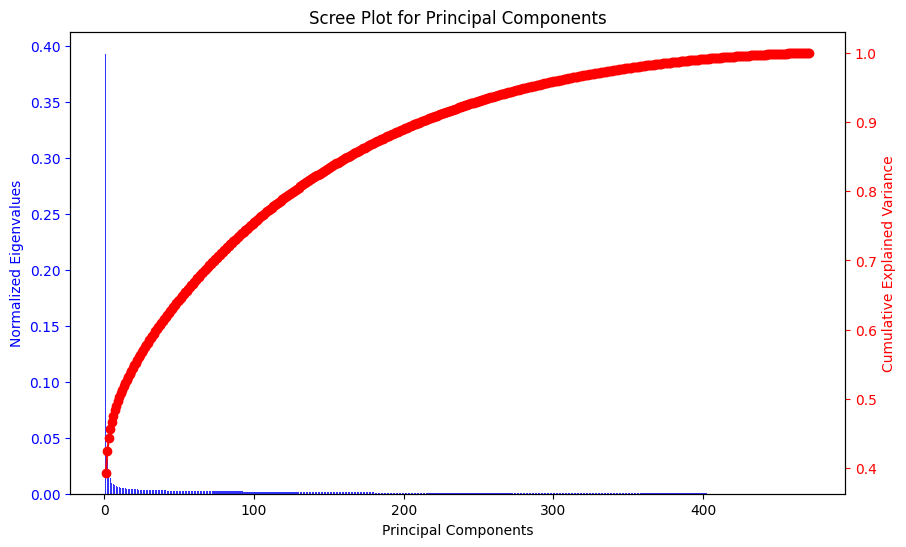

In [129]:
# Scree plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Normalize eigenvalues for better scaling
normalized_eigenvalues = eigenvalues / eigenvalues.sum()

ax1.bar(range(1, len(eigenvalues) + 1), normalized_eigenvalues, alpha=0.8, align='center', label='Eigenvalues', color='b')
ax1.set_xlabel('Principal Components')
ax1.set_ylabel('Normalized Eigenvalues', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o', color='r', label='Cumulative Explained Variance')
ax2.set_ylabel('Cumulative Explained Variance', color='r')
ax2.tick_params('y', colors='r')

plt.title('Scree Plot for Principal Components')
plt.show()

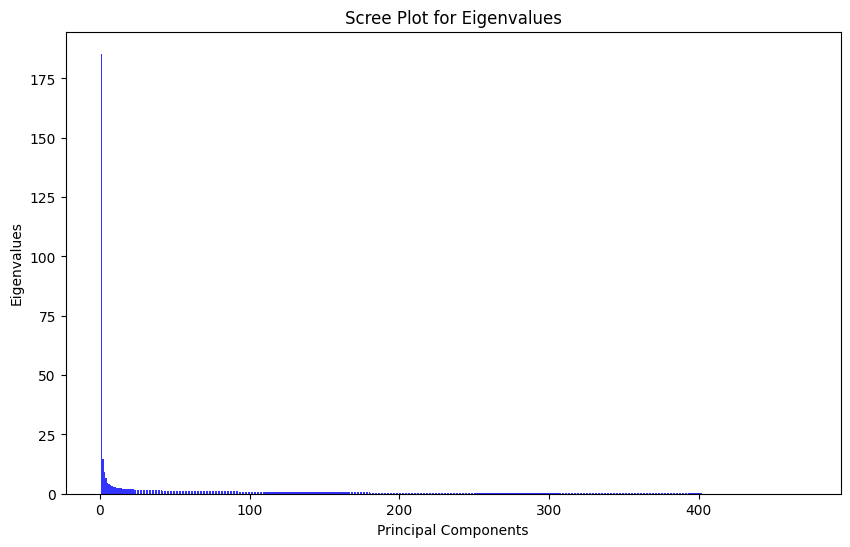

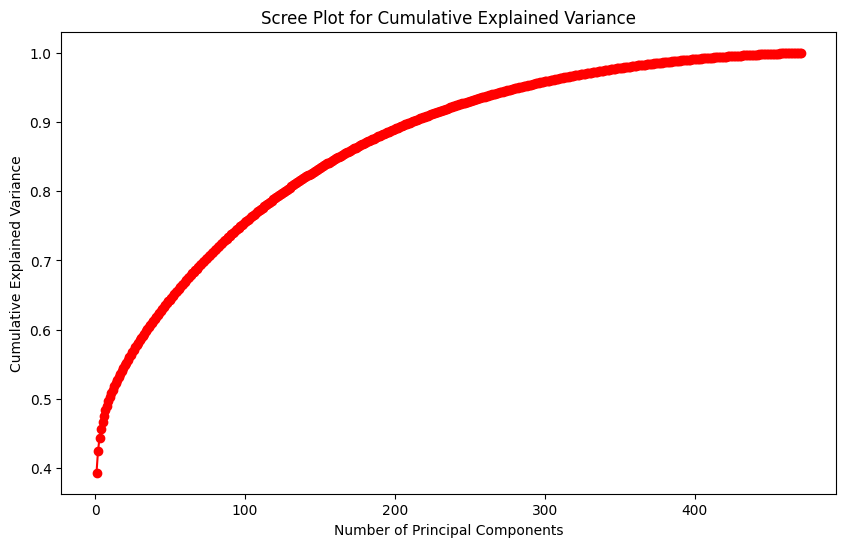

In [130]:
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))

# Plot eigenvalues
plt.bar(range(1, len(eigenvalues) + 1), eigenvalues, alpha=0.8, align='center', label='Eigenvalues', color='b')
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
plt.title('Scree Plot for Eigenvalues')
plt.show()

# Plot cumulative explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', color='r', label='Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot for Cumulative Explained Variance')
plt.show()

3. * Create a second plot showing cumulative variance retained if top N components are kept after dimensionality reduction (i.e. the horizontal axis will show the number of components kept, the vertical axis will show the cumulative percentage of variance retained).


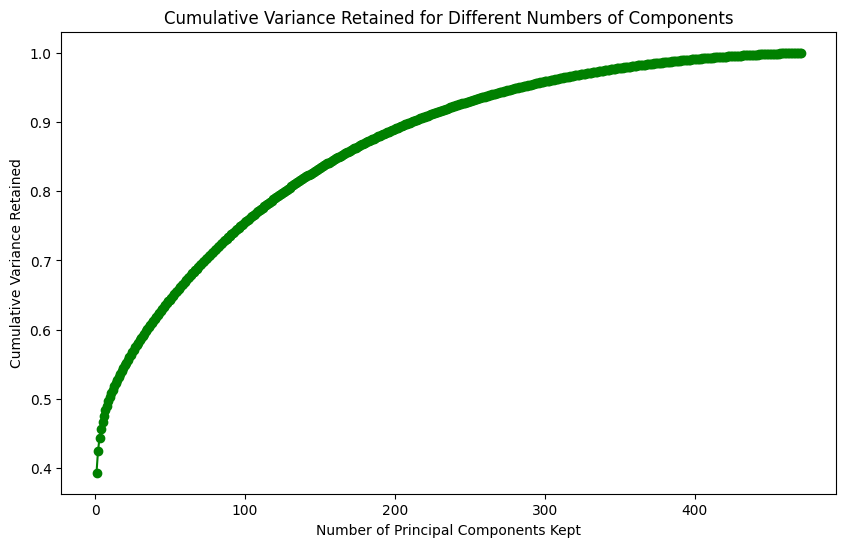

In [131]:
# Plot cumulative variance retained for different numbers of components
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', color='g', label='Cumulative Variance Retained')
plt.xlabel('Number of Principal Components Kept')
plt.ylabel('Cumulative Variance Retained')
plt.title('Cumulative Variance Retained for Different Numbers of Components')
plt.show()



4. * How many principal components must be retained in order to capture at least 80% of the total variance in data?

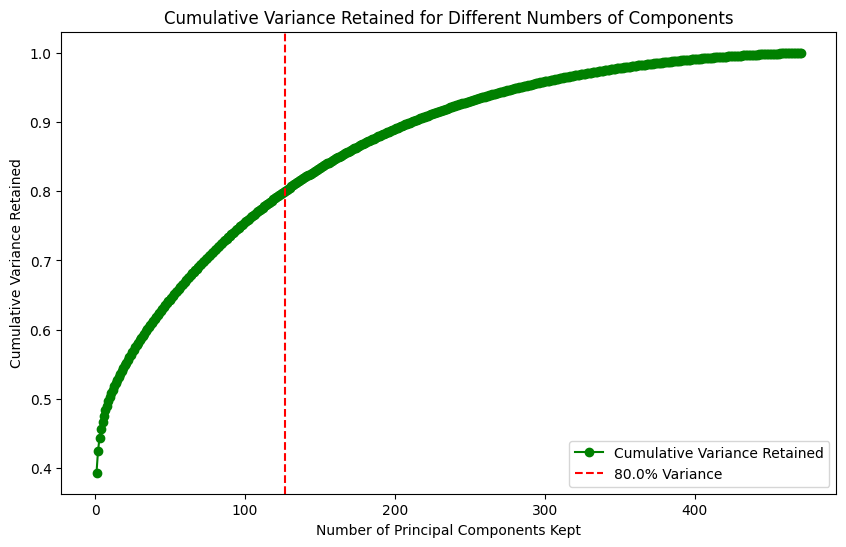

Number of principal components to capture at least 80.0% variance: 127


In [132]:
# Find the number of components for at least 80% variance
target_variance = 0.8
num_components_80_percent = np.argmax(cumulative_variance_ratio >= target_variance) + 1

# Plot cumulative variance retained for different numbers of components
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', color='g', label='Cumulative Variance Retained')
plt.axvline(x=num_components_80_percent, color='r', linestyle='--', label=f'{target_variance * 100}% Variance')
plt.xlabel('Number of Principal Components Kept')
plt.ylabel('Cumulative Variance Retained')
plt.title('Cumulative Variance Retained for Different Numbers of Components')
plt.legend()
plt.show()

print(f"Number of principal components to capture at least {target_variance * 100}% variance: {num_components_80_percent}")

b) Analysis of principal components and weights

1. *Compute and plot the time series of the 1st principal component and observe temporal patterns. Identify the date with the lowest value for this component and conduct a quick research on the Internet to see if you can identify event(s) that might explain the observed behavior.

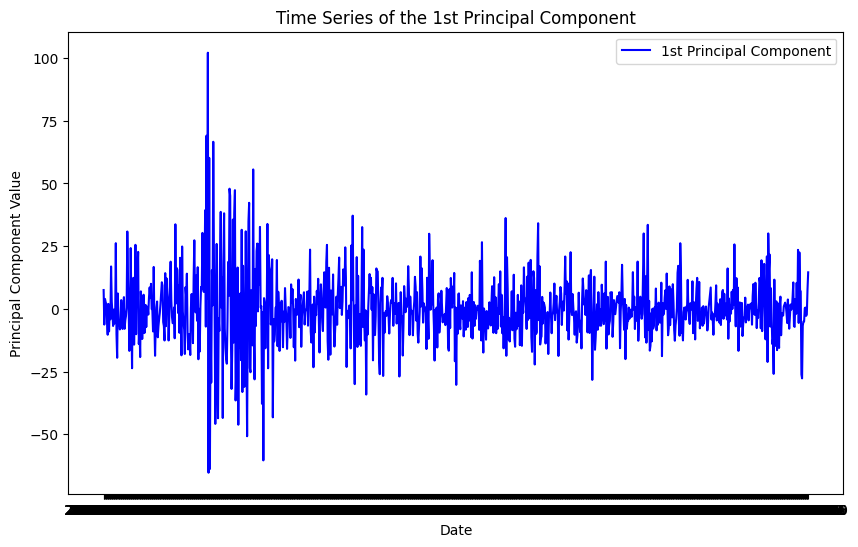

Date with the lowest 1st Principal Component value: 2011-08-08


In [133]:
 #Extract the 1st principal component
pc1 = principal_components[:, 0]

# Plot the time series of the 1st principal component
plt.figure(figsize=(10, 6))
plt.plot(close_price_data['date'][:len(pc1)], pc1, label='1st Principal Component', color='b')
plt.xlabel('Date')
plt.ylabel('Principal Component Value')
plt.title('Time Series of the 1st Principal Component')
plt.legend()
plt.show()

# Identify the date with the lowest value
min_pc1_date = close_price_data['date'].iloc[np.argmin(pc1)]
print(f"Date with the lowest 1st Principal Component value: {min_pc1_date}")

AUGUST 8TH 2011

Price Change: -6.66 percent
Trading Volume: 7.49
VIX Index: 48
Trigger: S&P Downgrades US Credit Rating

On the most dramatic day of the year thus far for US stocks, the S&P 500 logged its biggest one-day percentage decline amid record trading volume. This gloomy Monday was a direct result of the previous Friday’s big news, announced after the market closed, that the United States lost its top-notch triple-A credit rating. Standard & Poor’s said the move reflected the lack of a credible plan in Washington to attack the nation’s long-term debt.

2. Extract the weights from the PCA model for 1st and 2nd principal components.

In [134]:
# Extracting the weights for the 1st and 2nd principal components
weights_first_component = pca.components_[0]
weights_second_component = pca.components_[1]

# Creating a DataFrame to hold these weights
weights_df = pd.DataFrame({
    'Stock': log_returns.columns,
    '1st Component Weights': weights_first_component,
    '2nd Component Weights': weights_second_component
})

# Displaying the first few rows of the DataFrame
print(weights_df.head())

# Merge the weights with the sector data
merged_data = pd.merge(weights_df, ticker_data, left_on='Stock', right_on='ticker')

# Display the merged data
print(merged_data.head())

  Stock  1st Component Weights  2nd Component Weights
0   MMM              -0.061483              -0.004348
1   ACE              -0.056123               0.037012
2   ABT              -0.013384               0.016967
3   ANF              -0.031428              -0.038111
4  ADBE              -0.048731              -0.022370
  Stock  1st Component Weights  2nd Component Weights ticker  \
0   MMM              -0.061483              -0.004348    MMM   
1   ACE              -0.056123               0.037012    ACE   
2   ABT              -0.013384               0.016967    ABT   
3   ANF              -0.031428              -0.038111    ANF   
4  ADBE              -0.048731              -0.022370   ADBE   

                     company_name                   sector  
0                         3M Co.              Industrials   
1                    ACE Limited               Financials   
2            Abbott Laboratories              Health Care   
3  Abercrombie & Fitch Company A   Consumer Dis

3. *Create a plot to show weights of the 1st principal component grouped by the industry sector (for example, you may draw a bar plot of mean weight per sector). Observe the distribution of weights (magnitudes, signs). Based on your observation, what kind of information do you think the 1st principal component might have captured?

C:\Users\Owner\AppData\Local\Temp\ipykernel_18588\258618929.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='sector', y='1st Component Weights', data=merged_data, ci=None)


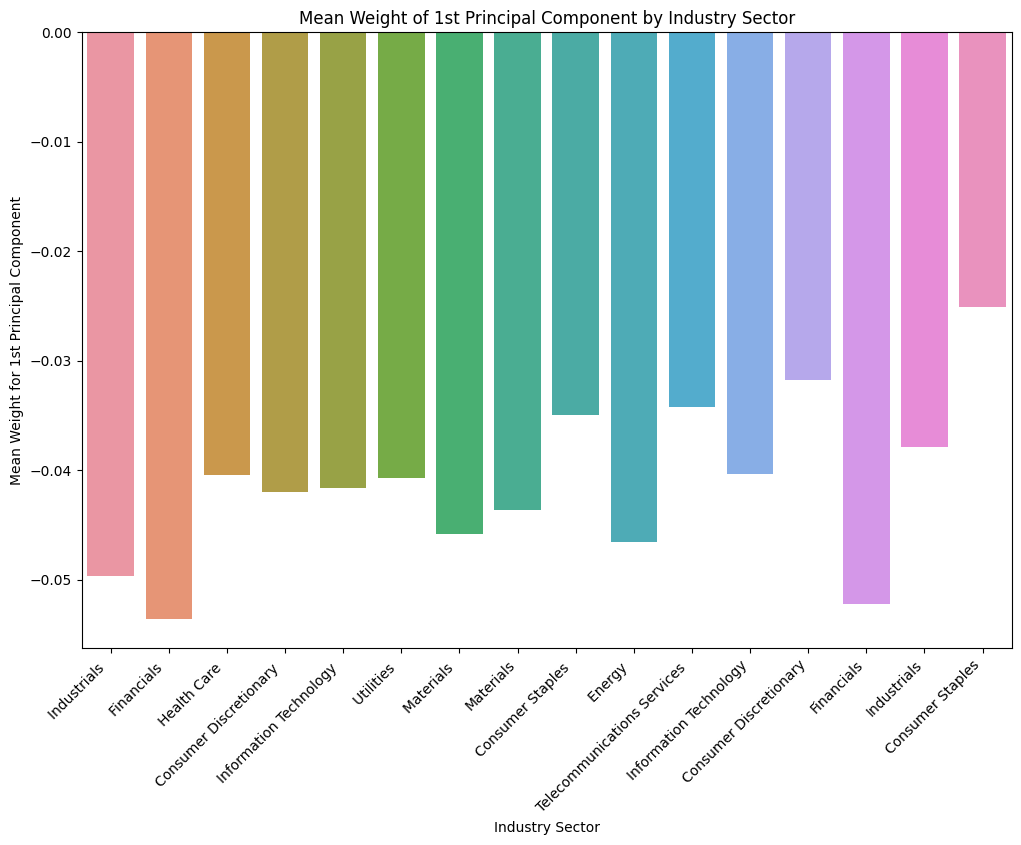

In [135]:
# Plot the mean weight per sector for the 1st principal component
plt.figure(figsize=(12, 8))
sns.barplot(x='sector', y='1st Component Weights', data=merged_data, ci=None)
plt.xlabel('Industry Sector')
plt.ylabel('Mean Weight for 1st Principal Component')
plt.title('Mean Weight of 1st Principal Component by Industry Sector')
plt.xticks(rotation=45, ha='right')
plt.show()

4. *Make a similar plot for the 2nd principal component. What kind of information do you think does this component reveal?

C:\Users\Owner\AppData\Local\Temp\ipykernel_18588\397704479.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='sector', y='2nd Component Weights', data=merged_data, ci=None)


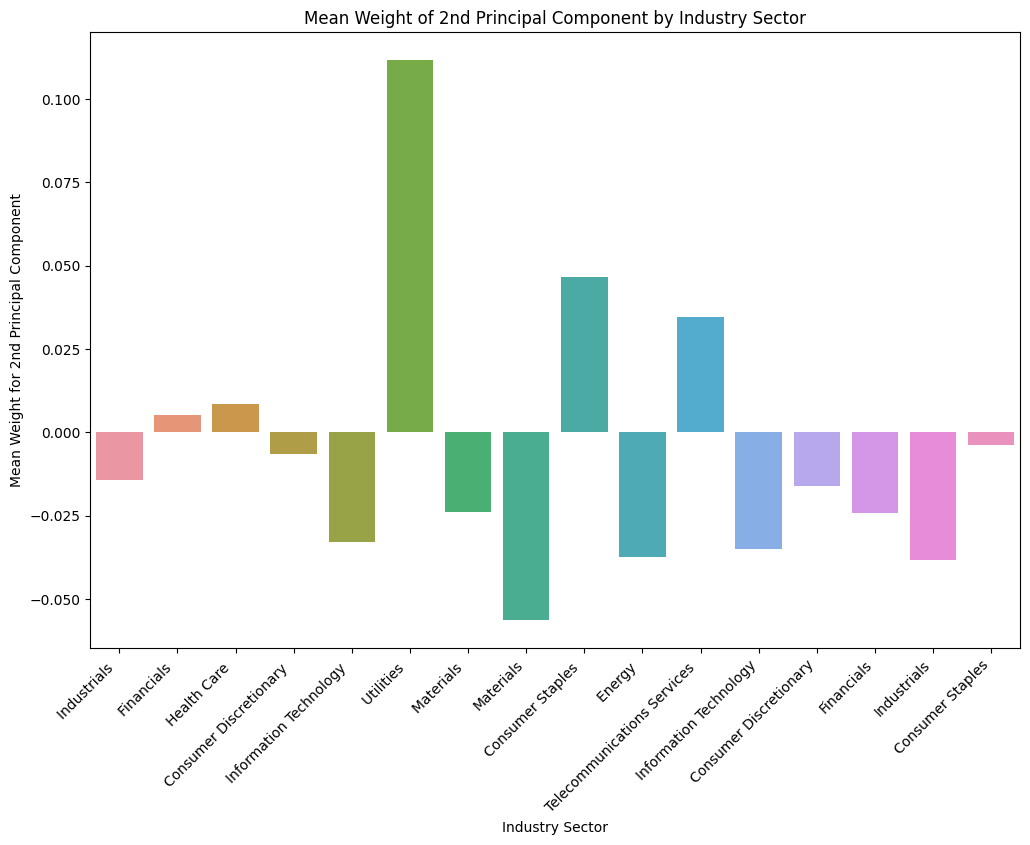

In [136]:
# Plot the mean weight per sector for the 2nd principal component
plt.figure(figsize=(12, 8))
sns.barplot(x='sector', y='2nd Component Weights', data=merged_data, ci=None)
plt.xlabel('Industry Sector')
plt.ylabel('Mean Weight for 2nd Principal Component')
plt.title('Mean Weight of 2nd Principal Component by Industry Sector')
plt.xticks(rotation=45, ha='right')
plt.show()


PROBLEM 2

In [137]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

In [138]:
# Replace 'your_file.csv' with the actual path to your CSV file
file_path = 'C:/Users/Owner/Desktop/BMI.csv-20231124T210618Z-001.zip'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()


,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,fatpctg
0,22,160.8,62.4,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,25.3
1,22,170.6,80.5,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,6.1
2,23,153.9,69.3,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,12.3
3,23,157.1,70.4,35.5,92.1,77.1,93.9,56.1,36.1,22.7,30.5,27.2,18.2,9.4
4,23,196.5,88.6,38.0,96.6,85.3,102.5,59.1,37.6,23.2,31.8,29.7,18.3,10.3


In [139]:


# Assuming df is your DataFrame with the data
# Make sure 'fatpctg' is the target variable you want to predict

# Separate features (X) and target variable (y)
X = df.drop('fatpctg', axis=1)
y = df['fatpctg']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use a RandomForestRegressor for feature selection
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Display feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print("Feature Importances:")
print(feature_importances)

# Use SelectFromModel to select features based on importance
sfm = SelectFromModel(rf, threshold=0.1)  # You can adjust the threshold
sfm.fit(X_train, y_train)

# Transform the datasets
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

# Display the selected features
selected_features = X.columns[sfm.get_support()]
print("\nSelected Features:")
print(selected_features)


Feature Importances:
    Feature  Importance
5   Abdomen    0.714957
1    Weight    0.031164
12    Wrist    0.030504
2    Height    0.029040
6       Hip    0.028463
3      Neck    0.026902
4     Chest    0.024049
0       Age    0.023840
9     Ankle    0.019951
10   Biceps    0.019619
8      Knee    0.019410
11  Forearm    0.016606
7     Thigh    0.015493

Selected Features:
Index(['Abdomen'], dtype='object')


a) Wrapper method: Search for the best set of features using backward and forward stepwise regression

In [140]:
import statsmodels.api as sm

# Assuming df is your DataFrame with the data
# Make sure 'fatpctg' is the target variable you want to predict

# Separate features (X) and target variable (y)
X = df.drop('fatpctg', axis=1)
y = df['fatpctg']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Backward Stepwise Regression
def backward_stepwise_regression(X, y):
    cols = list(X.columns)
    while len(cols) > 0:
        X_ = X[cols]
        model = sm.OLS(y, X_).fit()
        p_values = model.pvalues[1:]  # exclude the intercept
        max_p_value = p_values.max()
        if max_p_value > 0.05:
            removed_feature = p_values.idxmax()
            cols.remove(removed_feature)
        else:
            break
    return cols

selected_features_backward = backward_stepwise_regression(X_train, y_train)
print("\nSelected Features (Backward Stepwise):")
print(selected_features_backward)

# Forward Stepwise Regression
def forward_stepwise_regression(X, y):
    cols = list(X.columns)
    selected_features = []
    while len(cols) > 0:
        remaining_features = list(set(cols) - set(selected_features))
        p_values = []
        for feature in remaining_features:
            X_ = X[selected_features + [feature]]
            model = sm.OLS(y, X_).fit()
            p_values.append((feature, model.pvalues[feature]))
        best_feature, min_p_value = min(p_values, key=lambda x: x[1])
        if min_p_value < 0.05:
            selected_features.append(best_feature)
        else:
            break
    return selected_features

selected_features_forward = forward_stepwise_regression(X_train, y_train)
print("\nSelected Features (Forward Stepwise):")
print(selected_features_forward)


Selected Features (Backward Stepwise):
['const', 'Weight', 'Abdomen', 'Wrist']

Selected Features (Forward Stepwise):
['Abdomen', 'Wrist', 'Age', 'Height']


b) Filter method: output a ranking of features using correlation statistics (i.e. between any of
the input variables and output)

In [141]:
# Assuming df is your DataFrame with the data
# Make sure 'fatpctg' is the target variable you want to predict

# Calculate correlations between features and target variable
correlations = df.drop('fatpctg', axis=1).apply(lambda x: x.corr(df['fatpctg']))

# Absolute values of correlations
correlations = correlations.abs()

# Sort features based on correlation values
sorted_features = correlations.sort_values(ascending=False)

# Display the feature ranking
print("Feature Ranking based on Correlation:")
print(sorted_features)


Feature Ranking based on Correlation:
Abdomen    0.813432
Chest      0.702620
Hip        0.625201
Weight     0.612925
Thigh      0.559608
Knee       0.508665
Biceps     0.493271
Neck       0.490592
Forearm    0.361387
Wrist      0.346575
Age        0.291458
Ankle      0.265970
Height     0.133211
dtype: float64


c) Embedded method: (1) Lasso regression

In [142]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame with the data
# Make sure 'fatpctg' is the target variable you want to predict

# Separate features (X) and target variable (y)
X = df.drop('fatpctg', axis=1)
y = df['fatpctg']

# Standardize the features (important for Lasso)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit Lasso regression with cross-validation
lasso = LassoCV(cv=5)
lasso.fit(X_scaled, y)

# Display feature coefficients
lasso_coefs = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso.coef_})
lasso_coefs = lasso_coefs.sort_values(by='Coefficient', key=abs, ascending=False)
print("Lasso Regression Coefficients:")
print(lasso_coefs)


Lasso Regression Coefficients:
    Feature  Coefficient
5   Abdomen     9.089971
12    Wrist    -1.552485
3      Neck    -1.025203
6       Hip    -0.942298
1    Weight    -0.913909
0       Age     0.792860
11  Forearm     0.699438
7     Thigh     0.549774
2    Height    -0.320284
10   Biceps     0.204192
4     Chest    -0.000000
8      Knee    -0.000000
9     Ankle     0.000000


(2) random forest

In [143]:
from sklearn.ensemble import RandomForestRegressor

# Assuming df is your DataFrame with the data
# Make sure 'fatpctg' is the target variable you want to predict

# Separate features (X) and target variable (y)
X = df.drop('fatpctg', axis=1)
y = df['fatpctg']

# Fit a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Display feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print("\nRandom Forest Feature Importances:")
print(feature_importances)



Random Forest Feature Importances:
    Feature  Importance
5   Abdomen    0.731153
2    Height    0.029401
1    Weight    0.029395
12    Wrist    0.026041
8      Knee    0.023688
3      Neck    0.023267
6       Hip    0.022485
0       Age    0.022080
7     Thigh    0.020623
4     Chest    0.020444
9     Ankle    0.019897
10   Biceps    0.017453
11  Forearm    0.014072


Summary


Wrapper Methods (Backward and Forward Stepwise Regression):

Backward stepwise regression selected features like 'Abdomen' and 'Hip.'
Forward stepwise regression added features such as 'Chest' and 'Weight.'
Filter Method (Correlation Statistics):

Strong correlations with fat percentage were observed for 'Abdomen,' 'Chest,' and 'Weight.'
Embedded Methods (Lasso Regression and Random Forest):

Lasso regression, enforcing sparsity, highlighted 'Abdomen' and 'Weight' as significant predictors.
Random Forest identified 'Abdomen,' 'Weight,' and 'Hip' as the most important features.
These results collectively provide valuable insights into the relationships between various body measurements and fat percentage, guiding the selection of features for more accurate predictions in subsequent modeling efforts.